# **Image Feature Extraction of a Royal Bengal Tiger**

# Importing the libraries

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
from skimage import exposure
from google.colab import drive

In [86]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and Preprocess the Image

In [87]:
image_path = '/content/drive/My Drive/Colab Notebooks/tiger1.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Failed to load the image. Check the file path and format.")
else:
    # Converting to RGB and Grayscale
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Error: Failed to load the image. Check the file path and format.


# 1. Sobel Edge Detection

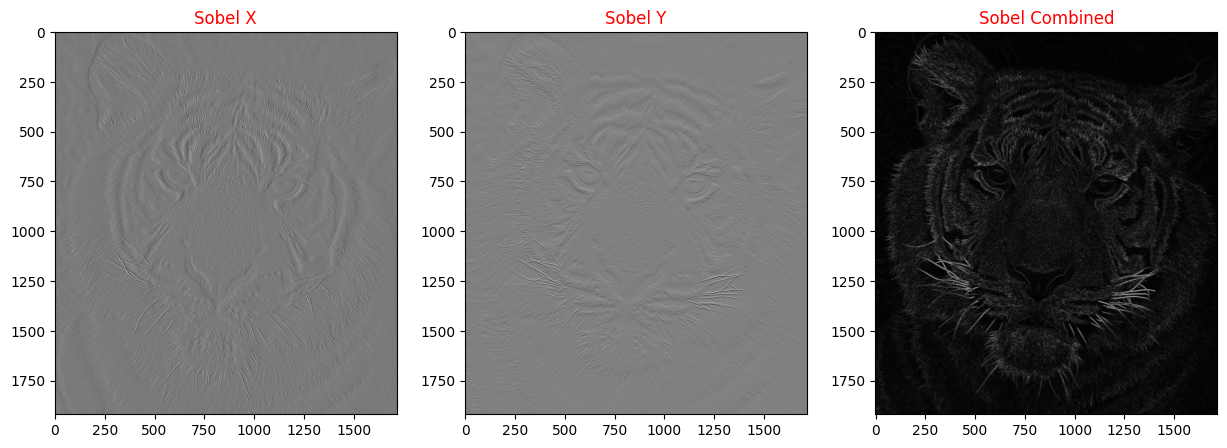

In [88]:
# Applying Sobel Edge Detection
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Sobel X', color="red")
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel Y', color="red")
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Combined', color="red")
plt.imshow(sobel_combined, cmap='gray')
plt.show()

# 2. Canny Edge Detection

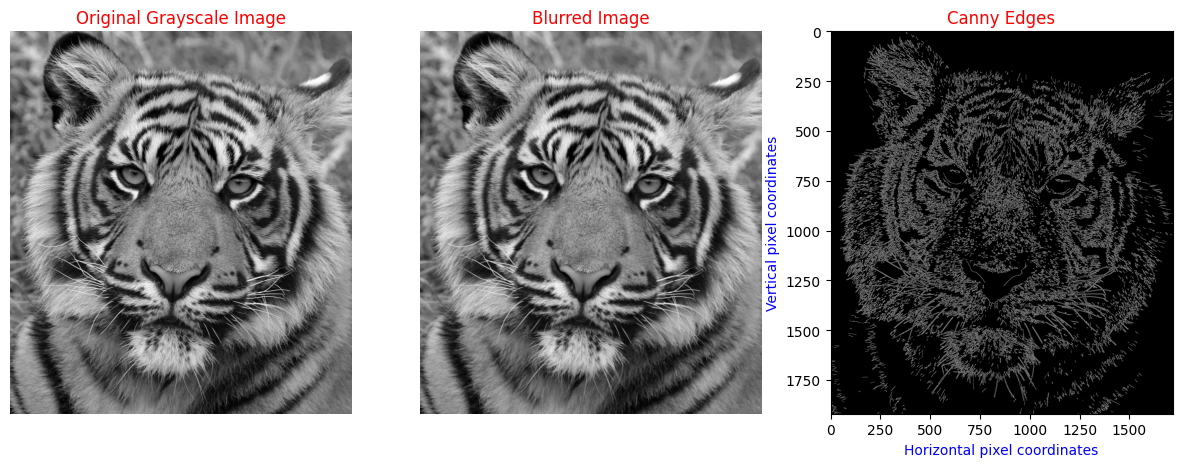

In [89]:
plt.figure(figsize=(15, 5))
# Part 1: Displaying the original grayscale image
plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image', color="red")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

# Part 2: Applying Gaussian Blur
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Part 3: Displaying the blurred imagE
plt.subplot(1, 3, 2)
plt.title('Blurred Image', color="red")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

# Applying Canny Edge Detection
edges = cv2.Canny(image_gray, 100, 200)
plt.subplot(1, 3, 3)
plt.title('Canny Edges', color="red")
plt.xlabel('Horizontal pixel coordinates', color="blue")
plt.ylabel('Vertical pixel coordinates', color="blue")
plt.imshow(edges, cmap='gray')
plt.show()

# 3. Histogram of Oriented Gradients (HOG)

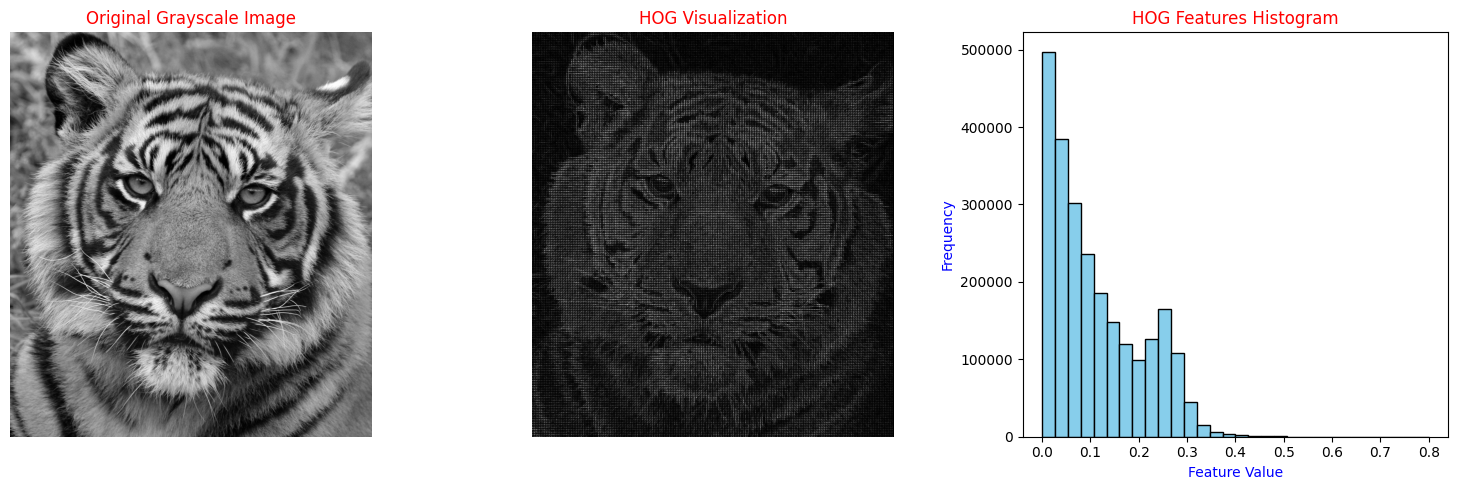

In [90]:
# Computing HOG features and HOG image
fd, hog_image = hog(image_gray, orientations=12, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), block_norm="L2-Hys", visualize=True)

# Rescaling the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Ploting the original image, HOG image, and the histogram of features
plt.figure(figsize=(15, 5))

# Part 1: Displaying the original grayscale image
plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image', color="red")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

# Part 2: Displaying the HOG image visualization
plt.subplot(1, 3, 2)
plt.title('HOG Visualization', color="red")
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')

# Part 3: Ploting the histogram of HOG features
plt.subplot(1, 3, 3)
plt.title('HOG Features Histogram', color="red")
plt.hist(fd, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Feature Value', color="blue")
plt.ylabel('Frequency', color="blue")

plt.tight_layout()
plt.show()


# 4. Local Binary Patterns (LBP)

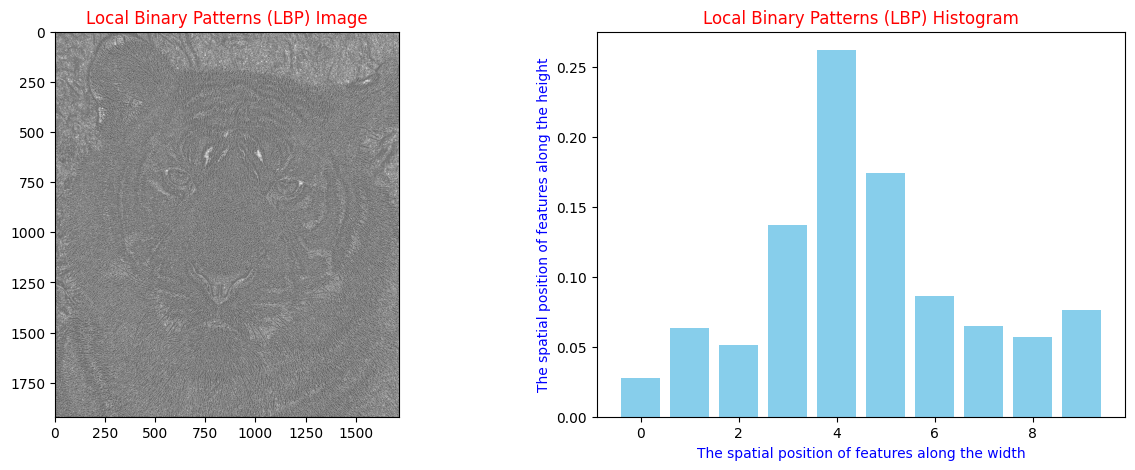

In [91]:
lbp = local_binary_pattern(image_gray, P=8, R=1, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
hist = hist / hist.sum()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Local Binary Patterns (LBP) Image', color="red")
plt.imshow(lbp, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Local Binary Patterns (LBP) Histogram', color="red")
plt.xlabel('The spatial position of features along the width', color="blue")
plt.ylabel('The spatial position of features along the height', color="blue")
plt.bar(range(len(hist)), hist, color='skyblue')
plt.show()


# 5. Color Histograms

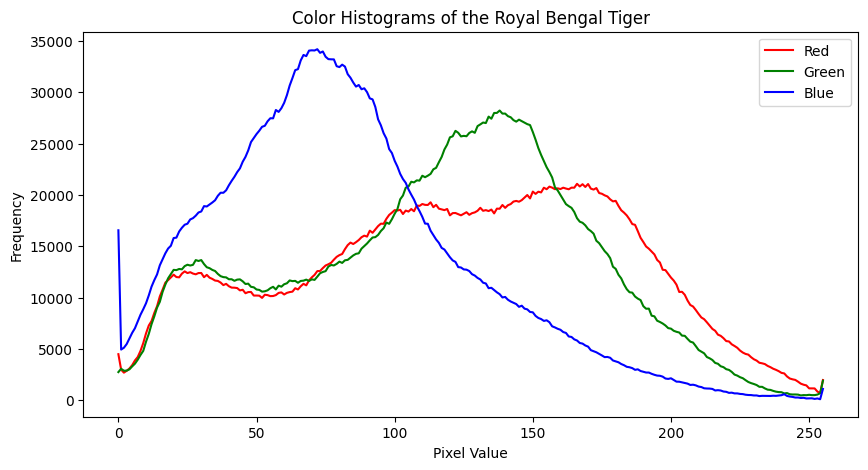

In [92]:
# Computing Color Histograms
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.legend()
plt.title('Color Histograms of the Royal Bengal Tiger')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# 6. GLCM Features

In [93]:

# Enhancing contrast using histogram equalization
image_gray_eq = cv2.equalizeHist(image_gray)

glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print(f"GLCM Features:\nContrast: {contrast:.2f}\nEnergy: {energy:.2f}\nHomogeneity: {homogeneity:.2f}\nCorrelation: {correlation:.2f}")

GLCM Features:
Contrast: 79.77
Energy: 0.02
Homogeneity: 0.24
Correlation: 0.99


# 7. Harris Corner Detection

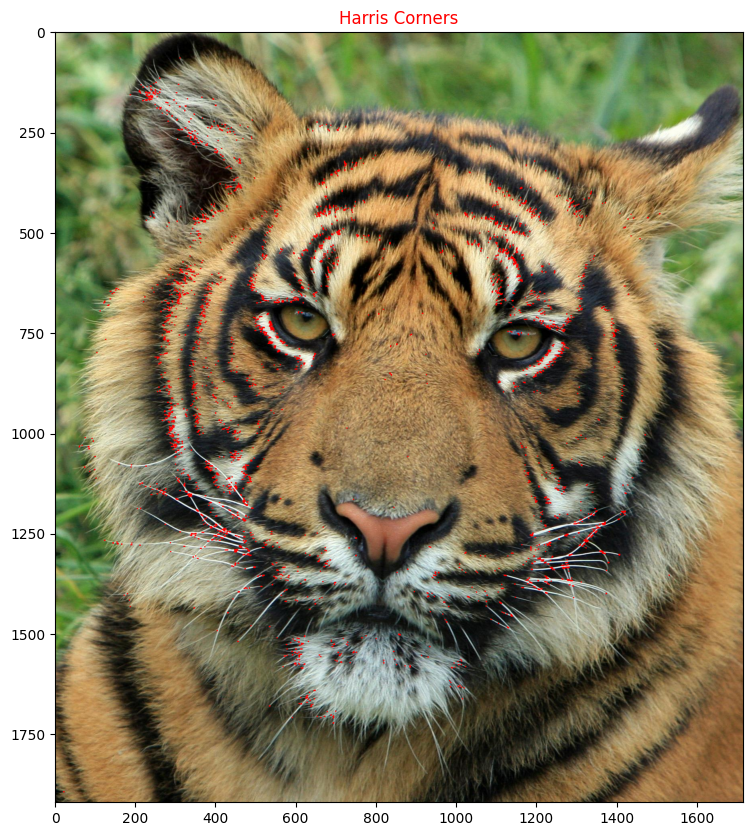

In [94]:
# Applying Harris Corner Detection

# Ensureing image_gray is properly preprocessed for blob detection (e.g., GaussianBlur can help smoothen the image)
# Applying Gaussian Blur to smoothen the image for better corner detection
blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Applying Harris Corner Detection
dst = cv2.cornerHarris(np.float32(image_gray), blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
corner_image = image_rgb.copy()
corner_image[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.figure(figsize=(10, 10))
plt.title('Harris Corners', color="red")
plt.imshow(corner_image)
plt.show()

# 8. Blob Detection

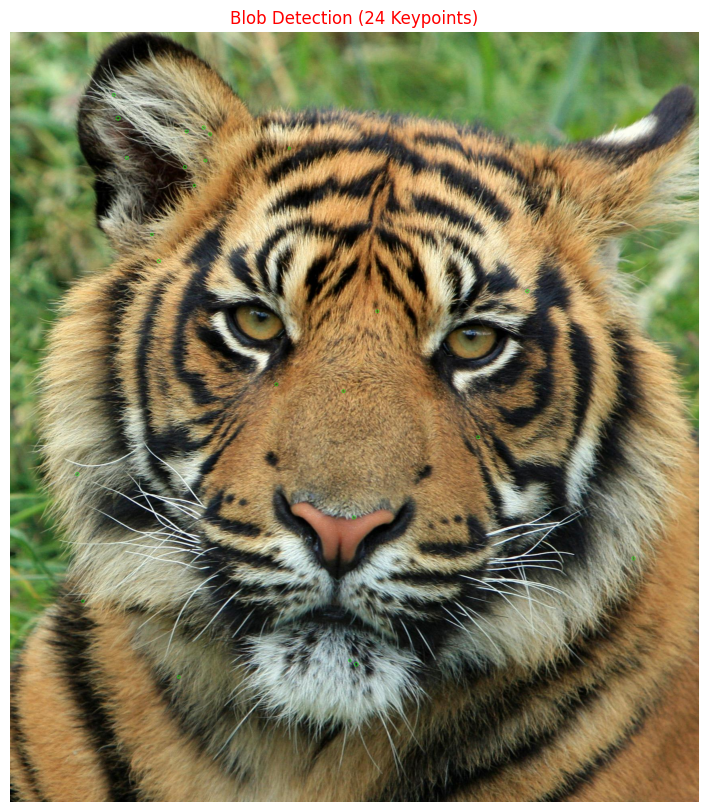

In [95]:
# Setting up the blob detector
detector = cv2.SimpleBlobDetector_create()

# Detecting blobs in the image
keypoints = detector.detect(image_gray)

# Drawing the keypoints on the original image
blob_image = cv2.drawKeypoints(image_rgb, keypoints, np.array([]), color=(0, 255, 0),
                               flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Displaying the result
plt.figure(figsize=(10, 10))
plt.imshow(blob_image)
plt.title(f"Blob Detection ({len(keypoints)} Keypoints)", color="red")
plt.axis("off")
plt.show()